In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw
fw('ignore')

In [4]:
social_ad = pd.read_csv('Social_Network_Ads.csv')
social_ad.head(9)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0


In [6]:
# label is categorical therefore, classification
social_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
social_ad['User ID'].nunique()

400

In [11]:
social_ad.drop('User ID', axis = 1, inplace = True)

In [15]:
social_ad.groupby('Gender').describe().T

Gender                        Female           Male
Age             count     204.000000     196.000000
                mean       38.411765      36.867347
                std        10.859019      10.043636
                min        18.000000      18.000000
                25%        30.000000      29.000000
                50%        37.500000      36.500000
                75%        47.000000      42.000000
                max        60.000000      60.000000
EstimatedSalary count     204.000000     196.000000
                mean    71759.803922   67642.857143
                std     35595.236189   32421.819181
                min     15000.000000   15000.000000
                25%     44000.000000   43000.000000
                50%     70500.000000   68000.000000
                75%     90750.000000   86000.000000
                max    150000.000000  150000.000000
Purchased       count     204.000000     196.000000
                mean        0.377451       0.336735
                std         0.485942       0.473804
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         0.000000       0.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000

In [18]:
social_ad.groupby(['Gender', 'Purchased']).describe().T

Gender                        Female                          Male  \
Purchased                          0              1              0   
Age             count     127.000000      77.000000     130.000000   
                mean       33.110236      47.155844      32.484615   
                std         8.468643       8.463645       7.504246   
                min        18.000000      27.000000      18.000000   
                25%        27.000000      42.000000      26.000000   
                50%        33.000000      48.000000      34.500000   
                75%        39.000000      53.000000      38.000000   
                max        59.000000      60.000000      49.000000   
EstimatedSalary count     127.000000      77.000000     130.000000   
                mean    61480.314961   88714.285714   59630.769231   
                std     25248.243816   43123.097103   23504.292355   
                min     15000.000000   20000.000000   15000.000000   
                25%     44000.000000   41000.000000   43500.000000   
                50%     62000.000000   96000.000000   60500.000000   
                75%     79000.000000  130000.000000   76750.000000   
                max    134000.000000  150000.000000  141000.000000   

Gender                                
Purchased                          1  
Age             count      66.000000  
                mean       45.500000  
                std         8.762244  
                min        28.000000  
                25%        39.000000  
                50%        46.000000  
                75%        50.500000  
                max        60.000000  
EstimatedSalary count      66.000000  
                mean    83424.242424  
                std     40937.122745  
                min     20000.000000  
                25%     41250.000000  
                50%     87500.000000  
                75%    117750.000000  
                max    150000.000000

In [19]:
social_ad['Male'] = pd.get_dummies(social_ad['Gender'], drop_first = True)
social_ad.drop('Gender', axis = 1, inplace = True)

In [20]:
social_ad.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


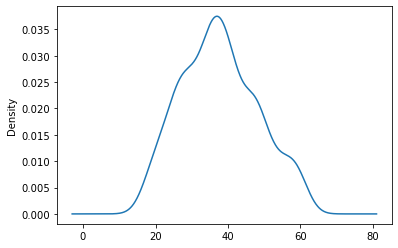

In [22]:
social_ad['Age'].plot.kde()

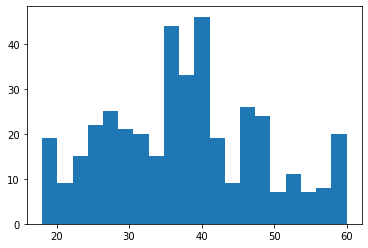

In [24]:
p = plt.hist(social_ad['Age'], bins= 20)

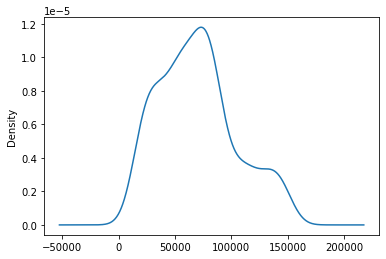

In [25]:
social_ad['EstimatedSalary'].plot.kde()

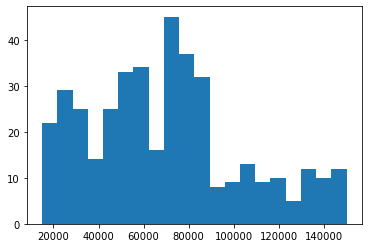

In [26]:
p = plt.hist(social_ad['EstimatedSalary'], bins= 20)

Text(0.5, 1.0, 'Purchased')

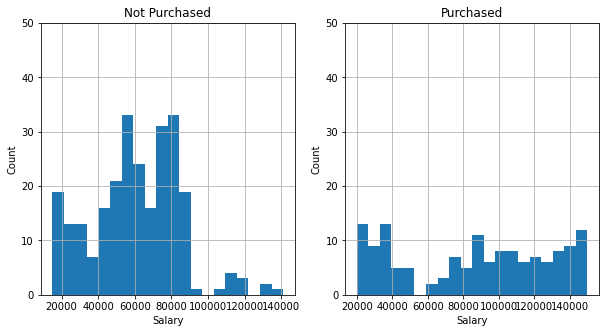

In [30]:
plt.figure(figsize = (10,5))
plt.subplot(1,2, 1)
p = plt.hist(social_ad[social_ad['Purchased']==0]['EstimatedSalary'], bins= 20)
plt.grid()
plt.ylim([0, 50])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Not Purchased')
plt.subplot(1,2, 2)
p = plt.hist(social_ad[social_ad['Purchased']==1]['EstimatedSalary'], bins= 20)
plt.grid()
plt.ylim([0, 50])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Purchased')

Text(0.5, 1.0, 'Purchased')

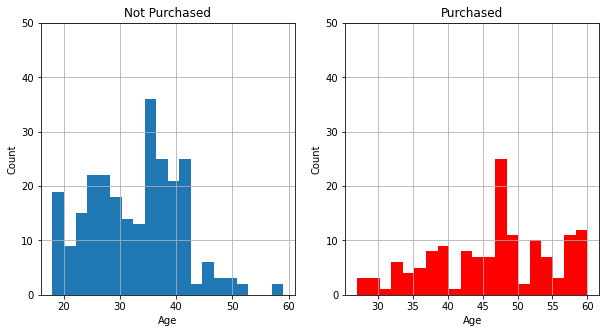

In [34]:
plt.figure(figsize = (10,5))
plt.subplot(1,2, 1)
p = plt.hist(social_ad[social_ad['Purchased']==0]['Age'], bins= 20)
plt.grid()
plt.ylim([0, 50])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Not Purchased')
plt.subplot(1,2, 2)
p = plt.hist(social_ad[social_ad['Purchased']==1]['Age'], bins= 20, color = 'r')
plt.grid()
plt.ylim([0, 50])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Purchased')

In [35]:
x = social_ad.drop('Purchased', axis = 1)
y = social_ad['Purchased']

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,  test_size = .25, random_state = 101)
model_dt = DecisionTreeClassifier().fit(xtrain, ytrain)
model_dt.score(xtest, ytest)

0.87

In [48]:
model_rf = RandomForestClassifier().fit(xtrain, ytrain)
model_rf.score(xtest, ytest)

0.91

In [50]:
model_dt.classes_

array([0, 1], dtype=int64)

In [53]:
imp_dt = pd.DataFrame(model_dt.feature_importances_*100, index = x.columns, columns = ['Feature_Importance'])
imp_dt

,Feature_Importance
Age,52.125484
EstimatedSalary,43.667427
Male,4.207089


In [54]:
imp_dt.sum()

Feature_Importance    100.0
dtype: float64

In [57]:
xx = social_ad.drop(['Purchased', 'Male'], axis = 1)
yy = y.copy()
xxtrain, xxtest, yytrain, yytest = train_test_split(xx, yy, test_size = .25, random_state = 101)
model_dt_ = DecisionTreeClassifier().fit(xxtrain, yytrain)
model_dt_.score(xxtest, yytest)

0.87

In [58]:
model_rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [60]:
model_rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=945489319),
 DecisionTreeClassifier(max_features='auto', random_state=2106862606),
 DecisionTreeClassifier(max_features='auto', random_state=963883286),
 DecisionTreeClassifier(max_features='auto', random_state=596502056),
 DecisionTreeClassifier(max_features='auto', random_state=1653450074),
 DecisionTreeClassifier(max_features='auto', random_state=1234920349),
 DecisionTreeClassifier(max_features='auto', random_state=1252257073),
 DecisionTreeClassifier(max_features='auto', random_state=126047407),
 DecisionTreeClassifier(max_features='auto', random_state=1575040882),
 DecisionTreeClassifier(max_features='auto', random_state=1476480369),
 DecisionTreeClassifier(max_features='auto', random_state=1203546767),
 DecisionTreeClassifier(max_features='auto', random_state=153208317),
 DecisionTreeClassifier(max_features='auto', random_state=1196648051),
 DecisionTreeClassifier(max_features='auto', random_state=474327700),
 DecisionTre

In [62]:
model_rf.feature_importances_*100

array([51.63207059, 47.3519133 ,  1.01601611])

In [66]:
model_rf_ = RandomForestClassifier().fit(xxtrain, yytrain)
model_rf_.score(xxtest, yytest)

0.9

In [73]:
# we have removed less important features from training data
model_dt_3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 101).fit(xxtrain, yytrain)
model_dt_3.score(xxtest, yytest)

0.86

In [84]:
scores = []
for i in range(5, 201, 5):
    model_rf_3 = RandomForestClassifier(n_estimators = i, random_state = 101).fit(xxtrain, yytrain)
    scores.append(round(model_rf_3.score(xxtest, yytest)*100, 2))

0

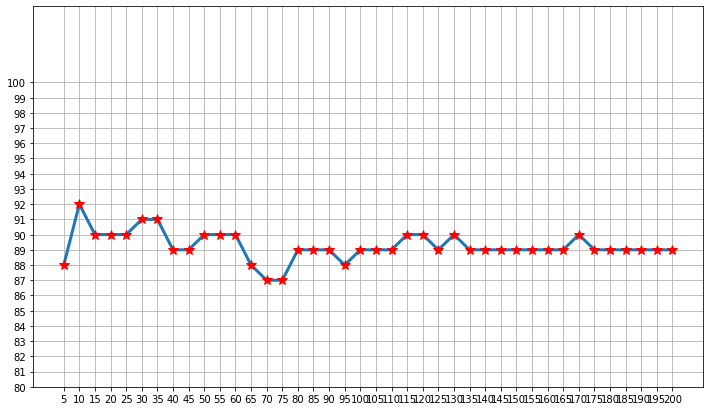

In [97]:
plt.figure(figsize = (12, 7))
plt.plot(range(5, 201, 5), scores, lw = 3, marker = '*', markersize = 10, markerfacecolor = 'r', markeredgecolor = 'r')
plt.grid()
plt.ylim([80, 105])
plt.yticks(range(80, 101, 1))
plt.xticks(range(5, 201, 5))
0

In [103]:
criterions = ['gini', 'entropy']
n_est = list(range(5, 201, 5))
min_splits = [2, 4, 6, 8, 10, 14, 18, 20]

In [107]:
params = {'n_estimators': n_est, 'criterion': criterions, 'min_samples_split': min_splits}

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
g_model = GridSearchCV(RandomForestClassifier(), param_grid = params, verbose = 3)
g_model.fit(xxtrain, yytrain)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.850, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.867, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.917, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.883, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.883, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.883, total= 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=15, score=0.867, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=15, score=0.917, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=15, score=0.850, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=15, score=0.883, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=20, score=0.883, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=20, score=0.883, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=2, n_estimat

[Parallel(n_jobs=1)]: Done 3200 out of 3200 | elapsed: 10.2min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, 150, ...]},
             verbose=3)

In [110]:
g_model.best_estimator_

RandomForestClassifier(min_samples_split=20, n_estimators=115)

In [111]:
g_model.best_params_

{'criterion': 'gini', 'min_samples_split': 20, 'n_estimators': 115}

In [112]:
g_model.best_estimator_.score(xxtest, yytest)

0.91

In [113]:
# considers time as well
# terefore doesn't show the highest score
# ye training data ka score h

In [118]:
model_best_from_view = RandomForestClassifier(criterion = 'entropy', min_samples_split = 20, ).fit(xxtrain, yytrain)

In [119]:
model_best_from_view.score(xxtest, yytest)
# ab testdata se dekh rhe score

0.91

In [121]:
model_best_from_view.score(xxtrain, yytrain)
# aur ye train data se

0.9266666666666666

In [ ]:
# best score was 90% with g_model {'criterion': 'gini', 'min_samples_split': 20, 'n_estimators': 115}